### MACS 30100
### PS5
### Lerong Wang

### 1(a)

In [510]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
import sklearn
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import train_test_split
from sklearn import metrics 
from sklearn.metrics import classification_report, confusion_matrix, mean_squared_error
from pylab import rcParams
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.model_selection import LeaveOneOut, KFold
from scipy.interpolate import LSQUnivariateSpline
%matplotlib inline
rcParams['figure.figsize'] = 10, 8
sb.set_style('whitegrid')

drink = pd.read_csv("strongdrink.txt")
drink.head()

,cultivar,alco,malic,ash,alk,magn,tot_phen,flav,nonfl_phen,proanth,color_int,hue,OD280rat,proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [511]:
drink.cultivar.value_counts()

2    71
1    59
3    46
Name: cultivar, dtype: int64

In [512]:
X = drink[['alco', 'malic', 'tot_phen', 'color_int']]
y = drink[['cultivar']]

In [513]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=20)
MultLogReg = LogisticRegression(multi_class='multinomial',
                                solver='newton-cg')
MultLogReg.fit(X_train, y_train)

/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='multinomial',
          n_jobs=1, penalty='l2', random_state=None, solver='newton-cg',
          tol=0.0001, verbose=0, warm_start=False)

In [514]:
y_pred = MultLogReg.predict(X_test)
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          1       0.87      1.00      0.93        13
          2       1.00      0.90      0.95        21
          3       1.00      1.00      1.00        10

avg / total       0.96      0.95      0.96        44



In [515]:
confusion_matrix(y_test, y_pred)

array([[13,  0,  0],
       [ 2, 19,  0],
       [ 0,  0, 10]])

In [516]:
MultLogReg.intercept_

array([-24.01133484,  22.8016831 ,   1.20965174])

In [517]:
MultLogReg.coef_
print("the coefficients for j=1 is ", MultLogReg.coef_[0], 
      "the intercept for j=1 is ", MultLogReg.intercept_[0])
print("the coefficients for j=2 is ", MultLogReg.coef_[1], 
      "the intercept for j=2 is ", MultLogReg.intercept_[1])

the coefficients for j=1 is  [ 1.70043278 -0.26560975  1.22389442  0.02274769] the intercept for j=1 is  -24.0113348438
the coefficients for j=2 is  [-1.46798554 -0.33305096  0.66400593 -0.9227089 ] the intercept for j=2 is  22.8016831016


In [518]:
print("error rates of first set is ", 1-0.87)
print("error rates of second set is ", 1-1)
print("error rates of third set is ", 1-1)
print('Validation set MSE = ', mean_squared_error(y_test, y_pred))

error rates of first set is  0.13
error rates of second set is  0
error rates of third set is  0
Validation set MSE =  0.0454545454545


When cultivar=3, the model is best at predicting, because it has both precision and recall equal to 1. It is not the predicted category with the most observations.

### 1(b)

In [519]:
Xvars = X.values
yvals = y.values
N_loo = Xvars.shape[0]
loo = LeaveOneOut()
loo.get_n_splits(Xvars)
MSE_vec = np.zeros(N_loo)
y_test2 = np.zeros(N_loo)
y_pred2 = np.zeros(N_loo)

for train_index, test_index in loo.split(Xvars):
    X_train, X_test = Xvars[train_index], Xvars[test_index]
    y_train, y_test = yvals[train_index], yvals[test_index]
    LogReg = LogisticRegression(multi_class='multinomial',
                                solver='newton-cg')
    LogReg.fit(X_train, y_train)
    y_pred = LogReg.predict(X_test)
    y_pred2[test_index] = y_pred
    y_test2[test_index] = y_test
    MSE_vec[test_index] = (y_test - y_pred) ** 2
    
MSE_loo = MSE_vec.mean()
MSE_loo_std = MSE_vec.std()
print('test estimate MSE loocv=', MSE_loo,
      ', test estimate MSE standard err=', MSE_loo_std)


/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


test estimate MSE loocv= 0.0965909090909 , test estimate MSE standard err= 0.394262505894


In [520]:
print(classification_report(y_test2, y_pred2))

             precision    recall  f1-score   support

        1.0       0.90      0.93      0.92        59
        2.0       0.91      0.90      0.91        71
        3.0       0.96      0.93      0.95        46

avg / total       0.92      0.92      0.92       176



In [521]:
print("error rates of first set is ", 1-0.9)
print("error rates of second set is ", 1-0.91)
print("error rates of third set is ", 1-0.96)

error rates of first set is  0.09999999999999998
error rates of second set is  0.08999999999999997
error rates of third set is  0.040000000000000036


The error rate when cultivar=1 is smaller, but the error rates when cultivar=2&3 are larger. Average MSE is also larger.

### 1(c)

In [522]:
from sklearn.model_selection import KFold
k=4
kf = KFold(n_splits=k, shuffle=True, random_state=10)
kf.get_n_splits(Xvars)
MSE_vec_kf = np.zeros(k)
y_test3 = np.array([])
y_pred3 = np.array([])
k_ind = int(0)

for train_index, test_index in kf.split(Xvars):
    # print("TRAIN:", train_index, "TEST:", test_index)
    print('k index=', k_ind)
    X_train, X_test = Xvars[train_index], Xvars[test_index]
    y_train, y_test = yvals[train_index], yvals[test_index]
    y_test3 = np.append(y_test3, y_test)
    LogReg = LogisticRegression(multi_class='multinomial',
                                solver='newton-cg')
    LogReg.fit(X_train, y_train)
    y_pred = LogReg.predict(X_test)
    y_pred3 = np.append(y_pred3, y_pred)
    MSE_vec_kf[k_ind] = mean_squared_error(y_pred, y_test)
    print('MSE for test set', k_ind, ' is', MSE_vec_kf[k_ind])
    k_ind += 1

MSE_kf = MSE_vec_kf.mean()
MSE_kf_std = MSE_vec_kf.std()
print('test estimate MSE k-fold=', MSE_kf,
      'test estimate MSE standard err=', MSE_kf_std)

k index= 0
MSE for test set 0  is 0.227272727273
k index= 1
MSE for test set 1  is 0.113636363636
k index= 2
MSE for test set 2  is 0.0454545454545
k index= 3
MSE for test set 3  is 0.0454545454545
test estimate MSE k-fold= 0.107954545455 test estimate MSE standard err= 0.0742994138104


/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [523]:
print(classification_report(y_test3, y_pred3))

             precision    recall  f1-score   support

        1.0       0.87      0.93      0.90        59
        2.0       0.91      0.87      0.89        71
        3.0       0.96      0.93      0.95        46

avg / total       0.91      0.91      0.91       176



In [524]:
print("error rates of first set is ", 1-0.87)
print("error rates of second set is ", 1-0.91)
print("error rates of third set is ", 1-0.96)

error rates of first set is  0.13
error rates of second set is  0.08999999999999997
error rates of third set is  0.040000000000000036


When cultivar=2 & 3, the error rates in part b & c are similar. When cultivar = 1, the error rates in part a & c are similar. But generally speaking, the error rates become larger compare to part a & b. 

### 2(a)

In [525]:
cool = pd.read_csv("CoolIndex.txt", header=None)
cool.columns = ['age', 'coolness']
age = cool['age']
coolness = cool['coolness']

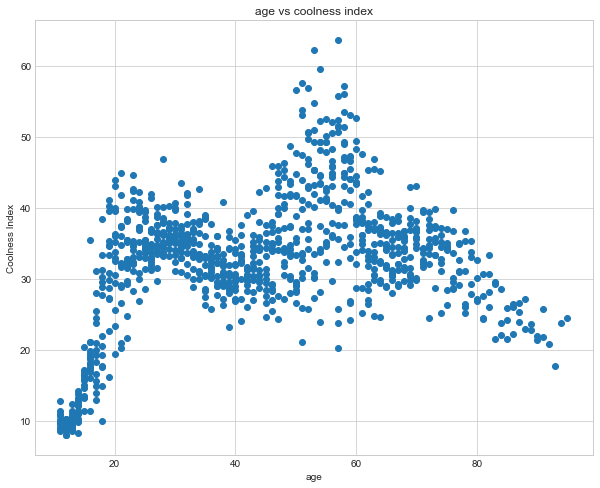

In [526]:
plt.scatter(age, coolness)
plt.xlabel('age')
plt.ylabel('Coolness Index')
plt.title('age vs coolness index')
plt.show()

### 2(b)

In [527]:
age_bin1 = ((age >= 11) & (age < 22)).astype(int)
age_bin2 = ((age >= 22) & (age < 40)).astype(int)
age_bin3 = ((age >= 40) & (age < 59)).astype(int)
age_bin4 = ((age >= 59) & (age < 77)).astype(int)
age_bin5 = ((age >= 77) & (age < 95)).astype(int)
X_step = pd.DataFrame(dict(age_bin1 = age_bin1, age_bin2 = age_bin2,
                           age_bin3 = age_bin3, age_bin4 = age_bin4,
                           age_bin5 = age_bin5))

In [528]:
import statsmodels.api as sm
from pandas.core import datetools
reg = sm.OLS(endog=coolness, exog=X_step, missing='drop')
reg_results = reg.fit()
y_pred4 = reg_results.predict(X_step)
print(reg_results.summary())

                            OLS Regression Results                            
Dep. Variable:               coolness   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.957
Method:                 Least Squares   F-statistic:                     4280.
Date:                Mon, 19 Feb 2018   Prob (F-statistic):               0.00
Time:                        01:17:37   Log-Likelihood:                -3220.5
No. Observations:                 956   AIC:                             6451.
Df Residuals:                     951   BIC:                             6475.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
age_bin1      20.1025      0.566     35.522      0.0

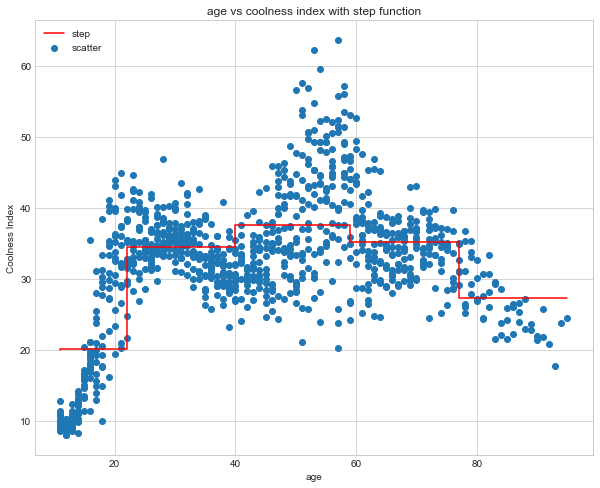

In [529]:
x = [11, 22, 40, 59, 77, 95]
y = reg_results.params
y = pd.concat([pd.Series([20]), y])
plt.scatter(age, coolness, label = 'scatter')
plt.step(x, y, color = 'r', label = 'step')
plt.legend(loc='upper left')
plt.xlabel('age')
plt.ylabel('Coolness Index')
plt.title('age vs coolness index with step function')
plt.show()

In [530]:
print(reg_results.params)

age_bin1    20.102457
age_bin2    34.475788
age_bin3    37.635105
age_bin4    35.225400
age_bin5    27.348167
dtype: float64


In [531]:
print("the predicted coolness of a 73-year old from the stepwise function is ", reg_results.params[3])

the predicted coolness of a 73-year old from the stepwise function is  35.2254000402


### 2(c)

In [532]:
t = [22, 40, 59, 77]
spl_linear = LSQUnivariateSpline(age.values, coolness.values, t, k=1)
age_group = np.linspace(age.values.min(), age.values.max(), 1000)

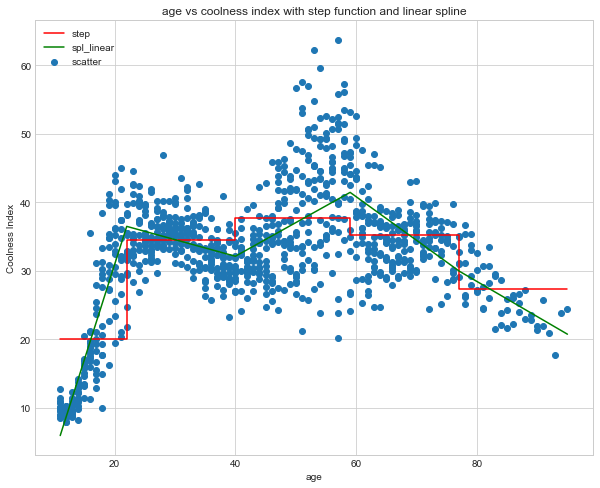

In [533]:
plt.scatter(age, coolness, label = 'scatter')
plt.step(x, y, color = 'r', label = 'step')
plt.plot(age_group, spl_linear(age_group), 'g', label = 'spl_linear')
plt.legend(loc='upper left')
plt.xlabel('age')
plt.ylabel('Coolness Index')
plt.title('age vs coolness index with step function and linear spline')
plt.show()

In [534]:
print("The predicted coolness for a 73-year-old is", spl_linear(73))

The predicted coolness for a 73-year-old is 32.536832389143306


### 2(d)

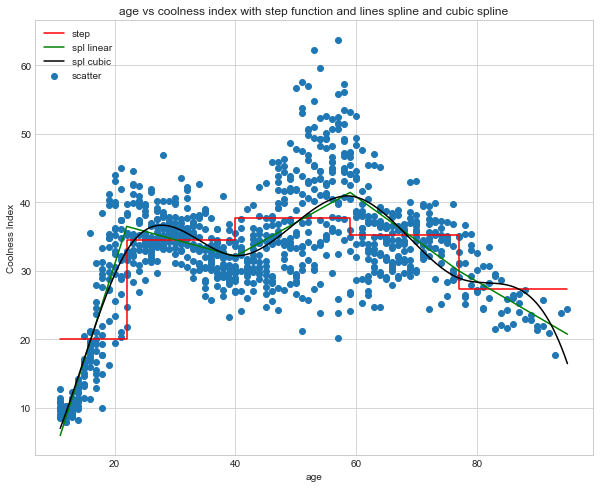

In [535]:
spl_cubic = LSQUnivariateSpline(age.values, coolness.values, t, k = 3)
plt.scatter(age, coolness, label = 'scatter')
plt.step(x, y, color = 'r', label = 'step')
plt.plot(age_group, spl_linear(age_group), 'g', label = 'spl linear')
plt.plot(age_group, spl_cubic(age_group), 'k', label = 'spl cubic')
plt.legend(loc='upper left')
plt.xlabel('age')
plt.ylabel('Coolness Index')
plt.title('age vs coolness index with step function and lines spline and cubic spline')
plt.show()

In [536]:
print("The predicted coolness for a 73-year-old is", spl_cubic(73))

The predicted coolness for a 73-year-old is 31.262429389257864
